<a href="https://colab.research.google.com/github/Aravind8281/Regression/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

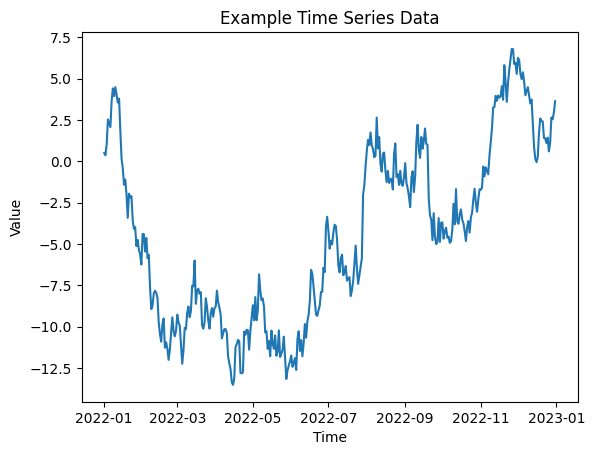

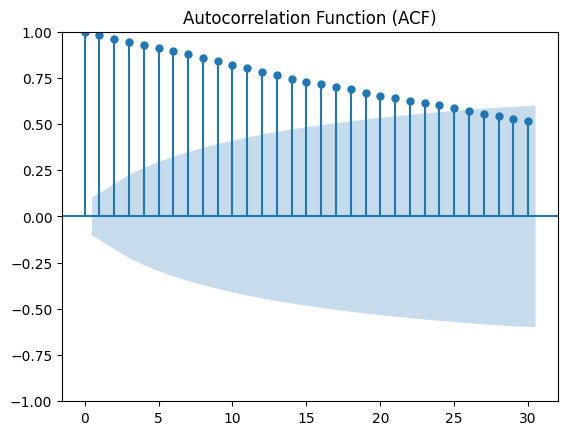

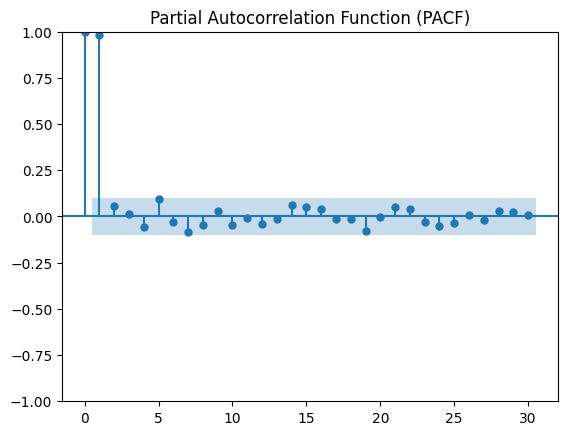

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -494.505
Date:                Sat, 20 Jan 2024   AIC                            999.010
Time:                        15:46:16   BIC                           1018.496
Sample:                    01-01-2022   HQIC                          1006.754
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2021      0.454     -2.648      0.008      -2.092      -0.313
ar.L2         -0.4036      0.419     -0.963      0.335      -1.225       0.418
ma.L1          1.1469      0.474      2.419      0.0

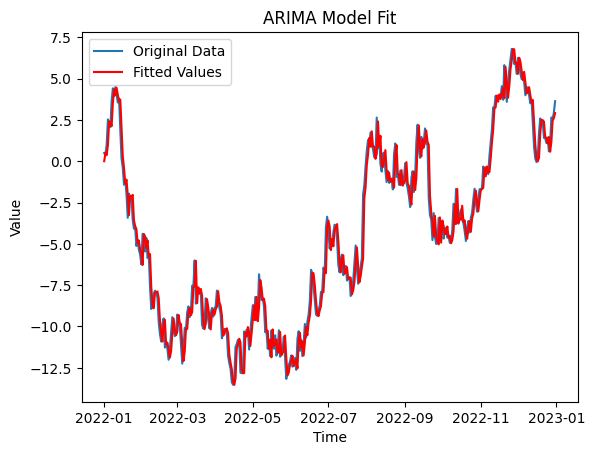

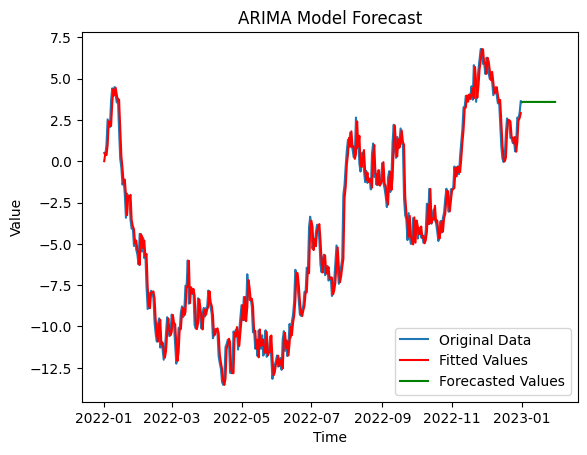

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate some example time series data
np.random.seed(42)
time = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = np.cumsum(np.random.normal(size=len(time)))
ts = pd.Series(data, index=time)

# Plot the time series data
plt.plot(ts)
plt.title('Example Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# ACF and PACF plots to determine p and q values
plot_acf(ts, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(ts, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit ARIMA model
order = (2, 1, 2)  # Example order (p, d, q)
model = ARIMA(ts, order=order)
fit_model = model.fit()

# Summary of the ARIMA model
print(fit_model.summary())

# Plot the original time series and the fitted values
plt.plot(ts, label='Original Data')
plt.plot(fit_model.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Forecast future values
forecast_steps = 30
forecast = fit_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='D')

# Plot the forecasted values
plt.plot(ts, label='Original Data')
plt.plot(fit_model.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast_index, forecast.predicted_mean, color='green', label='Forecasted Values')
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
